In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import re

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import shapiro
 
# mis cosas
import sys
import os

In [2]:
data = pd.read_parquet('data/raw/train.parquet') #aquí dejo el original de lectura de datos

data.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.00
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.00
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.00
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.60
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.00
5,548,Dell,Vostro 5468,Notebook,14.0,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.6kg,735.87
6,694,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
7,674,Dell,Latitude 3580,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.06kg,955.00
8,983,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.4kg,695.00
9,959,Lenovo,IdeaPad Y700-15ACZ,Gaming,15.6,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16GB,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.5kg,999.00


In [3]:
df = data.copy()
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.00
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.00
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.00
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.60
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00


In [4]:
df.set_index('laptop_ID', inplace=True)

print(df.shape)
print(df.info())
df.head()

(912, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    object 
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_euros       912 non-null    float64
dtypes: float64(1), object(11)
memory usage: 92.6+ KB
None


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


Voya a convertir los datos posibles en numéricos para trabajar con ellos. 

In [5]:
# primero trabajo en la columna RAM
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)  # Quita "GB" y convierte a entero

# Renombrar la columna 'Ram' a 'RAM (GB)'
df.rename(columns={"Ram": "RAM (GB)"}, inplace=True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM (GB),Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


In [6]:
# ahora la columna peso 
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)  # Quita "kg" y convierte a flotante

# Renombrar la columna 'Ram' a 'RAM (GB)'
df.rename(columns={"Weight": "Weight (kg)"}, inplace=True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.39,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,699.0
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,2419.0
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,836.6
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,1119.0


In [7]:
# ahora la columna pulgadas de la pantalla
df["Inches"] = df["Inches"].astype(float)  # convierte a flotante

df.rename(columns={'Inches': 'Inches(")'}, inplace=True)


In [8]:
df

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,RAM (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.39,603.00
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,699.00
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,2419.00
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,836.60
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,355.00
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,379.00
225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,2.20,677.35


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches(")         912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   RAM (GB)          912 non-null    int64  
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight (kg)       912 non-null    float64
 11  Price_euros       912 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 92.6+ KB


Voy a hacer una función para convertir en texto todas la columnas que cumplan:


In [10]:
def object_to_string(df):
    """
    Convierte todas las columnas de tipo 'object' a 'string'
    si no contienen valores nulos.
    """
    for col in df.select_dtypes(include='object').columns:
        if df[col].isna().sum() == 0:  # Verifica que no tenga nulos
            df[col] = df[col].astype("string")
    return df

In [11]:
df = object_to_string(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    string 
 1   Product           912 non-null    string 
 2   TypeName          912 non-null    string 
 3   Inches(")         912 non-null    float64
 4   ScreenResolution  912 non-null    string 
 5   Cpu               912 non-null    string 
 6   RAM (GB)          912 non-null    int64  
 7   Memory            912 non-null    string 
 8   Gpu               912 non-null    string 
 9   OpSys             912 non-null    string 
 10  Weight (kg)       912 non-null    float64
 11  Price_euros       912 non-null    float64
dtypes: float64(3), int64(1), string(8)
memory usage: 92.6 KB


Ahora hacemos las operaciones de dividir columnas en varias para segmentar la información, y así poder trabajar luego con ella.
Primeramente con la columna de Memory, subdividiendola en dos, con el valor que corresponde en cada caso. 

In [12]:
# Filtrar filas donde no aparezcan ni 'SSD' ni 'HDD'
filtered_df = df[~df['Memory'].str.contains('SSD|HDD|Flash', case=False, na=False)]
filtered_df

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,RAM (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,
1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32,825.00
1276,Lenovo,B51-80 (i7-6500U/8GB/1008GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,895.00
990,Lenovo,ThinkPad T460,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70,1002.00
1312,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99
1150,Lenovo,IdeaPad 500-15ISK,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,1099.00
1284,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99
154,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,899.00
1024,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,949.00
1298,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99


In [13]:
# Función para procesar cada fila
def split_memory(memory):
    # Inicializar los valores de las columnas
    memory_ssd = 0
    memory_hdd = 0
    memory_sshd = 0
    
    # Dividir el string por el separador '+'
    parts = memory.split('+')
    
    # Analizar cada parte
    for part in parts:
        part = part.strip()  # Limpiar espacios en blanco
        if 'SSD' in part or 'Flash' in part:
            memory_ssd = part
        elif 'HDD' in part:
            memory_hdd = part
        elif 'Hybrid' in part:
            memory_sshd = part
    
    return memory_ssd, memory_hdd, memory_sshd

# Aplicar la función a la columna 'Memory'
df[['Memory SSD', 'Memory HDD', 'Memory SSHD']] = df['Memory'].apply(split_memory).apply(pd.Series)

# Convertir valores faltantes o no definidos a '0'
df['Memory SSD'] = df['Memory SSD'].fillna('0')
df['Memory HDD'] = df['Memory HDD'].fillna('0')
df['Memory SSHD'] = df['Memory SSHD'].fillna('0')

# Mover las columnas con insert()
df.insert(8, 'Memory SSD', df.pop('Memory SSD'))
df.insert(9, 'Memory HDD', df.pop('Memory HDD'))
df.insert(10, 'Memory SSHD', df.pop('Memory SSHD'))

df


,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,RAM (GB),Memory,Memory SSD,Memory HDD,Memory SSHD,Gpu,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,128GB SSD,0,0,Intel HD Graphics 615,Windows 10,1.39,603.00
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,0,1TB HDD,0,AMD Radeon RX 560,Windows 10,2.45,699.00
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,256GB SSD,0,0,Nvidia Quadro M2200,Windows 10,2.60,2419.00
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,256GB SSD,0,0,Intel HD Graphics 620,Windows 10,1.58,836.60
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,256GB SSD,0,0,Intel HD Graphics 520,Windows 10,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,32GB Flash Storage,0,0,Intel HD Graphics 400,Chrome OS,1.35,355.00
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,32GB Flash Storage,0,0,Intel HD Graphics 400,Chrome OS,1.25,379.00
225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,256GB SSD,0,0,AMD Radeon 520,Linux,2.20,677.35


In [14]:
# Función para procesar las columnas
def memory_int (column):
    numeric_values = []
    for value in column:
        if value == '0' or value == 0:  # Si es 0, mantenerlo como está
            numeric_values.append(0)
        else:
            # Extraer el valor numérico
            number = int(''.join(filter(str.isdigit, value)))  # Extraer solo los números
            # Multiplicar por 1000 si contiene TB
            if 'TB' in value:
                number *= 1024
            numeric_values.append(number)
    return numeric_values

# Procesar cada columna y convertir a GB
df['Memory SSD (GB)'] = memory_int (df['Memory SSD'])
df['Memory HDD (GB)'] = memory_int (df['Memory HDD'])
df['Memory SSHD (GB)'] = memory_int (df['Memory SSHD'])

# Mover las columnas con insert()
df.insert(8, 'Memory SSD (GB)', df.pop('Memory SSD (GB)'))
df.insert(9, 'Memory HDD (GB)', df.pop('Memory HDD (GB)'))
df.insert(10, 'Memory SSHD (GB)', df.pop('Memory SSHD (GB)'))

# Eliminar las columnas originales
df = df.drop(columns=['Memory SSD', 'Memory HDD', 'Memory SSHD'])

# Mostrar el resultado
df

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,RAM (GB),Memory,Memory SSD (GB),Memory HDD (GB),Memory SSHD (GB),Gpu,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,128,0,0,Intel HD Graphics 615,Windows 10,1.39,603.00
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,0,1024,0,AMD Radeon RX 560,Windows 10,2.45,699.00
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,256,0,0,Nvidia Quadro M2200,Windows 10,2.60,2419.00
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,256,0,0,Intel HD Graphics 620,Windows 10,1.58,836.60
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,256,0,0,Intel HD Graphics 520,Windows 10,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,32,0,0,Intel HD Graphics 400,Chrome OS,1.35,355.00
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,32,0,0,Intel HD Graphics 400,Chrome OS,1.25,379.00
225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,256,0,0,AMD Radeon 520,Linux,2.20,677.35


In [15]:
# Extraer la primera palabra de la columna 'Cpu'
df['Cpu_Maker'] = df['Cpu'].str.split().str[0]

# Filtrar una fila por cada valor único en 'Cpu_Maker'
unique_cpu_df = df.drop_duplicates(subset='Cpu_Maker', keep='first')

# Mostrar el resultado
unique_cpu_df

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,RAM (GB),Memory,Memory SSD (GB),Memory HDD (GB),Memory SSHD (GB),Gpu,OpSys,Weight (kg),Price_euros,Cpu_Maker
laptop_ID,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,128,0,0,Intel HD Graphics 615,Windows 10,1.39,603.0,Intel
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,0,1024,0,AMD Radeon RX 560,Windows 10,2.45,699.0,AMD
1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,32,0,0,ARM Mali T860 MP4,Chrome OS,1.15,659.0,Samsung


In [16]:
# Eliminar las columna que acabo de crear
df = df.drop(columns=['Cpu_Maker'])

In [17]:
# Lista de valores únicos para 'CPU Maker'
cpu_makers = ['Intel', 'AMD', 'Samsung']

# Extraer 'CPU Maker' y el resto como 'CPU Model'
if 'CPU Maker' not in df.columns:
    df['CPU Maker'] = df['Cpu'].apply(lambda x: next((maker for maker in cpu_makers if maker in x), 'Other'))
if 'CPU Model' not in df.columns:
    df['CPU Model'] = df['Cpu'].str.replace('|'.join(cpu_makers), '', regex=True).str.strip()

# Reorganizar columnas para colocar las nuevas detrás de 'Cpu'
columnas = df.columns.tolist()
indice_cpu = columnas.index('Cpu')
new_cols_order = columnas[:indice_cpu + 1] + ['CPU Maker', 'CPU Model'] + columnas[indice_cpu + 1:-2]
df = df[new_cols_order]

df

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,CPU Maker,CPU Model,RAM (GB),Memory,Memory SSD (GB),Memory HDD (GB),Memory SSHD (GB),Gpu,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,Intel,Core M 7Y30 1.0GHz,4,128GB SSD,128,0,0,Intel HD Graphics 615,Windows 10,1.39,603.00
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,AMD,FX 9830P 3GHz,8,1TB HDD,0,1024,0,AMD Radeon RX 560,Windows 10,2.45,699.00
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,Intel,Core i7 7700HQ 2.8GHz,16,256GB SSD,256,0,0,Nvidia Quadro M2200,Windows 10,2.60,2419.00
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,Intel,Core i5 7200U 2.5GHz,8,256GB SSD,256,0,0,Intel HD Graphics 620,Windows 10,1.58,836.60
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,Intel,Core i5 6200U 2.3GHz,8,256GB SSD,256,0,0,Intel HD Graphics 520,Windows 10,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,Intel,Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,32,0,0,Intel HD Graphics 400,Chrome OS,1.35,355.00
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,Intel,Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,32,0,0,Intel HD Graphics 400,Chrome OS,1.25,379.00
225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,Intel,Core i5 8250U 1.6GHz,8,256GB SSD,256,0,0,AMD Radeon 520,Linux,2.20,677.35


In [18]:
# Extraer la primera palabra de la columna 'Gpu'
df['Gpu_Maker'] = df['Gpu'].str.split().str[0]

# Filtrar una fila por cada valor único en 'Gpu_Maker'
unique_gpu_df = df.drop_duplicates(subset='Gpu_Maker', keep='first')

# Mostrar el resultado
unique_gpu_df

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,CPU Maker,CPU Model,RAM (GB),Memory,Memory SSD (GB),Memory HDD (GB),Memory SSHD (GB),Gpu,OpSys,Weight (kg),Price_euros,Gpu_Maker
laptop_ID,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,Intel,Core M 7Y30 1.0GHz,4,128GB SSD,128,0,0,Intel HD Graphics 615,Windows 10,1.39,603.0,Intel
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,AMD,FX 9830P 3GHz,8,1TB HDD,0,1024,0,AMD Radeon RX 560,Windows 10,2.45,699.0,AMD
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,Intel,Core i7 7700HQ 2.8GHz,16,256GB SSD,256,0,0,Nvidia Quadro M2200,Windows 10,2.60,2419.0,Nvidia
1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,Samsung,Cortex A72&A53 2.0GHz,4,32GB Flash Storage,32,0,0,ARM Mali T860 MP4,Chrome OS,1.15,659.0,ARM


In [19]:
# Eliminar las columna que acabo de crear
df = df.drop(columns=['Gpu_Maker'])

In [20]:
# Lista de valores únicos para 'GPU Maker'
gpu_makers = ['Intel', 'AMD', 'Nvidia', 'ARM']

# Extraer 'GPU Maker' y el resto como 'GPU Model'
if 'GPU Maker' not in df.columns:
    df['GPU Maker'] = df['Gpu'].apply(lambda x: next((maker for maker in gpu_makers if maker in x), 'Other'))
if 'GPU Model' not in df.columns:
    df['GPU Model'] = df['Gpu'].str.replace('|'.join(gpu_makers), '', regex=True).str.strip()

# Reorganizar columnas para colocar las nuevas detrás de 'Gpu'
columnas = df.columns.tolist()
indice_gpu = columnas.index('Gpu')
new_cols_order = columnas[:indice_gpu + 1] + ['GPU Maker', 'GPU Model'] + columnas[indice_gpu + 1:-2]
df = df[new_cols_order]

df.head()

,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,CPU Maker,CPU Model,RAM (GB),Memory,Memory SSD (GB),Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,Intel,Core M 7Y30 1.0GHz,4,128GB SSD,128,0,0,Intel HD Graphics 615,Intel,HD Graphics 615,Windows 10,1.39,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,AMD,FX 9830P 3GHz,8,1TB HDD,0,1024,0,AMD Radeon RX 560,AMD,Radeon RX 560,Windows 10,2.45,699.0
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,Intel,Core i7 7700HQ 2.8GHz,16,256GB SSD,256,0,0,Nvidia Quadro M2200,Nvidia,Quadro M2200,Windows 10,2.60,2419.0
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,Intel,Core i5 7200U 2.5GHz,8,256GB SSD,256,0,0,Intel HD Graphics 620,Intel,HD Graphics 620,Windows 10,1.58,836.6
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,Intel,Core i5 6200U 2.3GHz,8,256GB SSD,256,0,0,Intel HD Graphics 520,Intel,HD Graphics 520,Windows 10,2.20,1119.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    string 
 1   Product           912 non-null    string 
 2   TypeName          912 non-null    string 
 3   Inches(")         912 non-null    float64
 4   ScreenResolution  912 non-null    string 
 5   Cpu               912 non-null    string 
 6   CPU Maker         912 non-null    object 
 7   CPU Model         912 non-null    string 
 8   RAM (GB)          912 non-null    int64  
 9   Memory            912 non-null    string 
 10  Memory SSD (GB)   912 non-null    int64  
 11  Memory HDD (GB)   912 non-null    int64  
 12  Memory SSHD (GB)  912 non-null    int64  
 13  Gpu               912 non-null    string 
 14  GPU Maker         912 non-null    object 
 15  GPU Model         912 non-null    string 
 16  OpSys             912 non-null    string 
 17  W

In [22]:
# Filtrar valores únicos de 'OpSys' y convertirlos a un DataFrame
unique_os_df = pd.DataFrame({'OpSys': df['OpSys'].unique()})

unique_os_df

,OpSys
0,Windows 10
1,Chrome OS
2,Windows 10 S
3,Windows 7
4,Linux
5,No OS
6,Mac OS X
7,macOS
8,Android


In [23]:
df_mac = df[df["OpSys"].str.contains("mac", case=False, na=False)]
df_mac


,Company,Product,TypeName,"Inches("")",ScreenResolution,Cpu,CPU Maker,CPU Model,RAM (GB),Memory,Memory SSD (GB),Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,
7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,Intel,Core i7 2.2GHz,16,256GB Flash Storage,256,0,0,Intel Iris Pro Graphics,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,Intel,Core i5 2.3GHz,8,128GB SSD,128,0,0,Intel Iris Plus Graphics 640,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
15,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,Intel,Core M m3 1.2GHz,8,256GB SSD,256,0,0,Intel HD Graphics 615,Intel,HD Graphics 615,macOS,0.92,1262.40
254,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,Intel,Core i5 3.1GHz,8,512GB SSD,512,0,0,Intel Iris Plus Graphics 650,Intel,Iris Plus Graphics 650,macOS,1.37,2040.00
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,Intel,Core i5 3.1GHz,8,256GB SSD,256,0,0,Intel Iris Plus Graphics 650,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
1228,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,Intel,Core M 1.2GHz,8,512GB Flash Storage,512,0,0,Intel HD Graphics 515,Intel,HD Graphics 515,Mac OS X,0.92,1279.00
1084,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,Intel,Core M 1.1GHz,8,256GB Flash Storage,256,0,0,Intel HD Graphics 515,Intel,HD Graphics 515,Mac OS X,0.92,1300.00
27,Apple,MacBook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,Intel,Core i5 1.6GHz,8,128GB Flash Storage,128,0,0,Intel HD Graphics 6000,Intel,HD Graphics 6000,Mac OS X,1.35,1099.00
1211,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,Intel,Core M 1.1GHz,8,256GB Flash Storage,256,0,0,Intel HD Graphics 5300,Intel,HD Graphics 5300,Mac OS X,0.92,1163.00


Voy a estandarizar los nombres de los sistemas operativos, y despues segregar la columna en fabricante y versión

In [24]:
# Diccionario de normalización
mapeo_sistemas = {
    "Windows 10": ("Windows", "10"),
    "Windows 10 S": ("Windows", "10 S"),
    "Windows 7": ("Windows", "7"),
    "Mac OS X": ("Apple", "Mac OS X"),
    "macOS": ("Apple", "macOS"),
    "Linux": ("Linux", "0"),
    "Chrome OS": ("Chrome", "0"),
    "No OS": ("0", "No OS"),
    "Android": ("Android", "0")
}

# Función para mapear fabricante y versión
def obtener_fabricante_version(op):
    return mapeo_sistemas.get(op, ("Desconocido", "Desconocido"))

# Aplicar la función a la columna OpSys
df[["OS Maker", "OS Version"]] = df["OpSys"].apply(lambda x: pd.Series(obtener_fabricante_version(x)))

# Reemplazar la columna original con valores normalizados
df["OpSys"] = df["OpSys"].replace(mapeo_sistemas.keys(), mapeo_sistemas.keys())  # Mantiene la info original

# Mostrar resultado
print(df[["OpSys", "OS Maker", "OS Version"]])

                OpSys OS Maker OS Version
laptop_ID                                
599        Windows 10  Windows         10
92         Windows 10  Windows         10
744        Windows 10  Windows         10
729        Windows 10  Windows         10
957        Windows 10  Windows         10
...               ...      ...        ...
837         Chrome OS   Chrome          0
626         Chrome OS   Chrome          0
225             Linux    Linux          0
17         Windows 10  Windows         10
87         Windows 10  Windows         10

[912 rows x 3 columns]


In [25]:
# Reordenar las columnas para que 'OS_Maker' y 'OS_Version' estén después de 'OpSys'
columnas = df.columns.tolist()  # Obtener todas las columnas
indice_opsys = columnas.index("OpSys")  # Encontrar la posición de 'OpSys'
columnas.insert(indice_opsys + 1, columnas.pop(columnas.index("OS Maker")))  # Insertar 'OS_Maker' después de 'OpSys'
columnas.insert(indice_opsys + 2, columnas.pop(columnas.index("OS Version")))  # Insertar 'OS_Version' después de 'OS_Maker'

df = df[columnas]  # Reorganizar el DataFrame con el nuevo orden


In [26]:
df['ScreenResolution']

laptop_ID
599              Touchscreen 1366x768
92                  Full HD 1920x1080
744                 Full HD 1920x1080
729    IPS Panel Touchscreen 1366x768
957                          1366x768
                    ...              
837                IPS Panel 1366x768
626    IPS Panel Touchscreen 1366x768
225                 Full HD 1920x1080
17                  Full HD 1920x1080
87        IPS Panel Full HD 1920x1080
Name: ScreenResolution, Length: 912, dtype: string

In [27]:
print(df["ScreenResolution"].unique())  # Verifica qué resoluciones extrae

<StringArray>
[                         'Touchscreen 1366x768',
                             'Full HD 1920x1080',
                'IPS Panel Touchscreen 1366x768',
                                      '1366x768',
                   'IPS Panel Full HD 1920x1080',
                         'Touchscreen 2400x1600',
     'IPS Panel Full HD / Touchscreen 1920x1080',
               'Full HD / Touchscreen 1920x1080',
                            'IPS Panel 1366x768',
           '4K Ultra HD / Touchscreen 3840x2160',
                                      '1600x900',
    'IPS Panel Quad HD+ / Touchscreen 3200x1800',
            'IPS Panel Retina Display 2880x1800',
                            'Quad HD+ 3200x1800',
              'Touchscreen / Quad HD+ 3200x1800',
                         'Touchscreen 2560x1440',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
              'Quad HD+ / Touchscreen 3200x1800',
            'IPS Panel Retina Display 2560x1600',
                         'Touchscree

Voy a hacer una asunción, que en toda pantalla que no indica que es panel IPS, se trata de un panel estándar TN, de calidad más baja. Esto lo querré usar luego para usar IPS para entrenar mejor al modelo. 

In [28]:
# Función para dividir el tipo de pantalla y la resolución
def separar_screen_resolution(sr):
    sr = str(sr).strip()  # Convertir a string y limpiar espacios
    partes = sr.rsplit(' ', 1)  # Divide solo en el último espacio
    
    if len(partes) == 2 and 'x' in partes [1]:  
        return partes[0], partes[1]  # Tipo de pantalla y resolución
    return 'Standard TN', partes[0] # Si no hay tipo de pantalla, asignar "Standard"



# Aplicar la función y crear las nuevas columnas. Y convierte sus valores en string, en vez de object
df[["ScreenType", "Resolution"]] = df["ScreenResolution"].apply(lambda x: pd.Series(separar_screen_resolution(x))).astype("string")

In [29]:
type(df.loc[:,["ScreenType", "Resolution"]])

pandas.core.frame.DataFrame

In [30]:
type(df["ScreenResolution"])

pandas.core.series.Series

In [31]:
print(df["Resolution"].unique())  # Verifica qué resoluciones extrae


<StringArray>
[ '1366x768', '1920x1080', '2400x1600', '3840x2160',  '1600x900', '3200x1800',
 '2880x1800', '2560x1440', '2560x1600', '2256x1504', '1920x1200', '2160x1440',
 '2304x1440', '2736x1824',  '1440x900']
Length: 15, dtype: string


In [32]:
# Función para calcular el número total de píxeles
def calcular_pixels(resolution):
    try:
        width, height = map(int, resolution.split('x'))  # Separar y convertir a enteros
        return width * height  # Multiplicación de la resolución
    except ValueError:
        return None  # Manejo de errores en caso de valores incorrectos

# Aplicar la función para crear la nueva columna 'Pixels'
df.loc[:,["Pixels"]] = df["Resolution"].apply(calcular_pixels).astype('int32')

In [33]:
# Reordenar las columnas para que estén después de ScreenResolution
columnas = df.columns.tolist()  # Obtener todas las columnas
indice_screen = columnas.index("ScreenResolution")  # Encontrar la posición de 'ScreenResolution'
columnas.insert(indice_screen + 1, columnas.pop(columnas.index("ScreenType"))) 
columnas.insert(indice_screen + 2, columnas.pop(columnas.index("Resolution")))  
columnas.insert(indice_screen + 3, columnas.pop(columnas.index("Pixels")))  


df = df[columnas]  # Reorganizar el DataFrame con el nuevo orden

df

,Company,Product,TypeName,"Inches("")",ScreenResolution,ScreenType,Resolution,Pixels,Cpu,CPU Maker,...,Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,OS Maker,OS Version,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Touchscreen,1366x768,1049088,Intel Core M 7Y30 1.0GHz,Intel,...,0,0,Intel HD Graphics 615,Intel,HD Graphics 615,Windows 10,Windows,10,1.39,603.00
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,Full HD,1920x1080,2073600,AMD FX 9830P 3GHz,AMD,...,1024,0,AMD Radeon RX 560,AMD,Radeon RX 560,Windows 10,Windows,10,2.45,699.00
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Full HD,1920x1080,2073600,Intel Core i7 7700HQ 2.8GHz,Intel,...,0,0,Nvidia Quadro M2200,Nvidia,Quadro M2200,Windows 10,Windows,10,2.60,2419.00
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,IPS Panel Touchscreen,1366x768,1049088,Intel Core i5 7200U 2.5GHz,Intel,...,0,0,Intel HD Graphics 620,Intel,HD Graphics 620,Windows 10,Windows,10,1.58,836.60
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Standard TN,1366x768,1049088,Intel Core i5 6200U 2.3GHz,Intel,...,0,0,Intel HD Graphics 520,Intel,HD Graphics 520,Windows 10,Windows,10,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,IPS Panel,1366x768,1049088,Intel Celeron Dual Core N3060 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.35,355.00
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,IPS Panel Touchscreen,1366x768,1049088,Intel Celeron Quad Core N3160 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.25,379.00
225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Full HD,1920x1080,2073600,Intel Core i5 8250U 1.6GHz,Intel,...,0,0,AMD Radeon 520,AMD,Radeon 520,Linux,Linux,0,2.20,677.35


## Análisis univariado

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    string 
 1   Product           912 non-null    string 
 2   TypeName          912 non-null    string 
 3   Inches(")         912 non-null    float64
 4   ScreenResolution  912 non-null    string 
 5   ScreenType        912 non-null    string 
 6   Resolution        912 non-null    string 
 7   Pixels            912 non-null    int32  
 8   Cpu               912 non-null    string 
 9   CPU Maker         912 non-null    object 
 10  CPU Model         912 non-null    string 
 11  RAM (GB)          912 non-null    int64  
 12  Memory            912 non-null    string 
 13  Memory SSD (GB)   912 non-null    int64  
 14  Memory HDD (GB)   912 non-null    int64  
 15  Memory SSHD (GB)  912 non-null    int64  
 16  Gpu               912 non-null    string 
 17  G

In [35]:
# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

# Generar el pairplot
# sns.pairplot(df_numericas, diag_kind="kde")  
# plt.show()

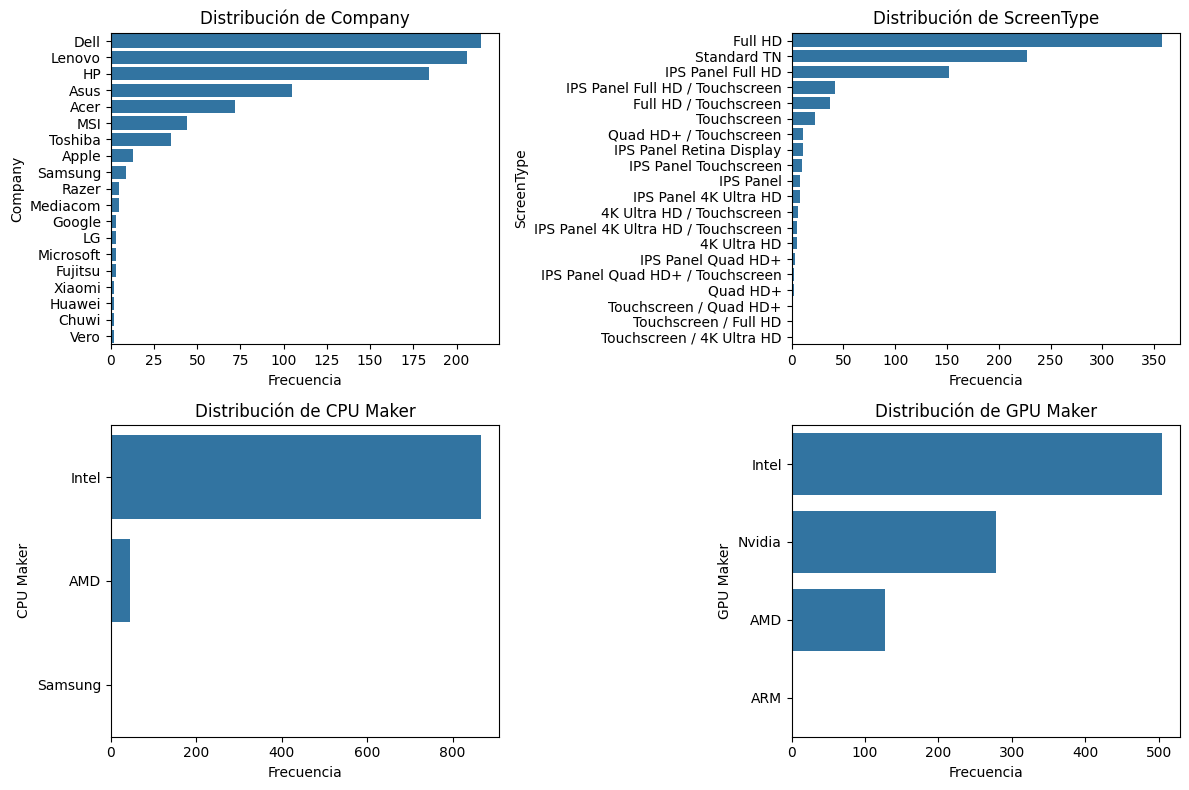

In [36]:
plt.figure(figsize=(12, 8))

# Lista de columnas categóricas a graficar
categorical_columns = ['Company', 'ScreenType', 'CPU Maker', 'GPU Maker']

# Crear gráficos de barras para cada columna categórica
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

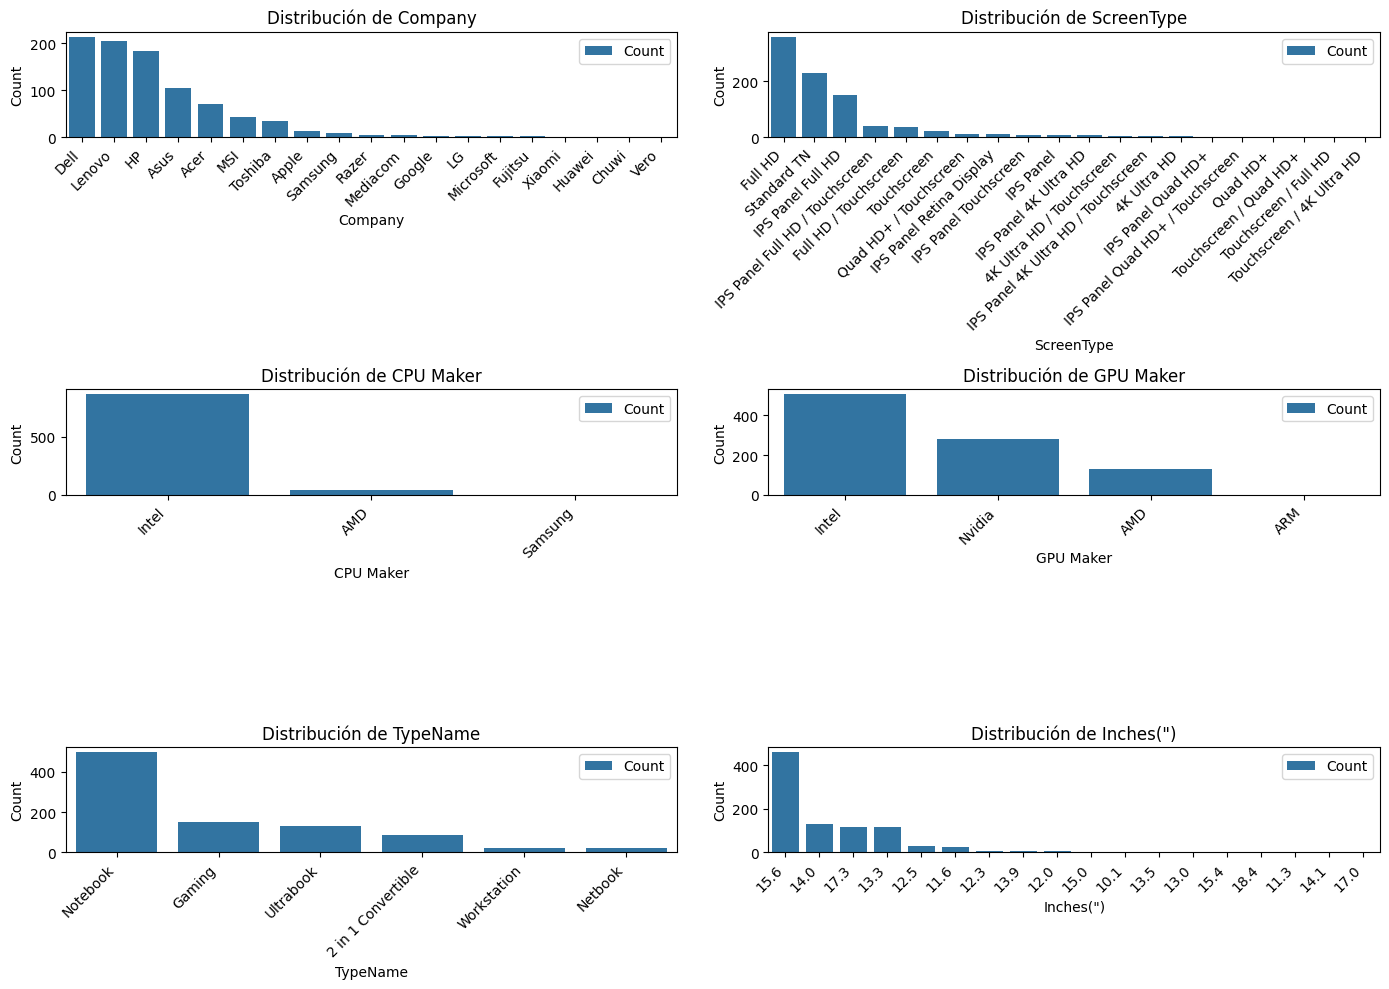

In [37]:
plt.figure(figsize=(14, 10))

# Lista de columnas categóricas a graficar
categorical_columns = ['Company', 'ScreenType', 'CPU Maker', 'GPU Maker', 'TypeName', 'Inches(")']

# Crear gráficos de barras para cada columna categórica
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)  # 3 filas, 2 columnas
    ax = sns.countplot(x=df[column], order=df[column].value_counts().index)
    
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    
    # Rotar etiquetas si son largas
    plt.xticks(rotation=45, ha='right')

    # Agregar leyenda
    ax.legend(["Count"], loc="upper right")

plt.tight_layout()
plt.show()


In [38]:
#casilla con varios filtros para tomar decisiones de si eliminar filas:
df_samsung_cpu = df[df['CPU Maker'] == 'Samsung']
df_samsung_cpu




,Company,Product,TypeName,"Inches("")",ScreenResolution,ScreenType,Resolution,Pixels,Cpu,CPU Maker,...,Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,OS Maker,OS Version,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,IPS Panel Touchscreen,2400x1600,3840000,Samsung Cortex A72&A53 2.0GHz,Samsung,...,0,0,ARM Mali T860 MP4,ARM,Mali T860 MP4,Chrome OS,Chrome,0,1.15,659.0


In [39]:
df_arm_gpu = df[df['GPU Maker'] == 'ARM']
df_arm_gpu

,Company,Product,TypeName,"Inches("")",ScreenResolution,ScreenType,Resolution,Pixels,Cpu,CPU Maker,...,Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,OS Maker,OS Version,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,IPS Panel Touchscreen,2400x1600,3840000,Samsung Cortex A72&A53 2.0GHz,Samsung,...,0,0,ARM Mali T860 MP4,ARM,Mali T860 MP4,Chrome OS,Chrome,0,1.15,659.0


Con lo anterior, elimino el portatil raro de Samsung. Luego ya manejaré los Unknown en ML.

In [40]:
df = df.drop(index=1209)

In [41]:
df_workstation_netbook = df[df['TypeName'].isin(['Workstation', 'Netbook'])].astype('object')
df_workstation_netbook.loc[:, 'TypeName'] = pd.Categorical(df_workstation_netbook['TypeName'], 
                                                    categories=['Workstation', 'Netbook'], 
                                                    ordered=True)
df_workstation_netbook = df_workstation_netbook.sort_values('TypeName')

# Contar modelos
num_workstation = (df_workstation_netbook['TypeName'] == 'Workstation').sum()
num_netbook = (df_workstation_netbook['TypeName'] == 'Netbook').sum()

# Imprimir resultados
print(f"Hay {num_workstation} modelos de Workstation y {num_netbook} modelos de Netbook.")

df_workstation_netbook

Hay 24 modelos de Workstation y 22 modelos de Netbook.


,Company,Product,TypeName,"Inches("")",ScreenResolution,ScreenType,Resolution,Pixels,Cpu,CPU Maker,...,Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,OS Maker,OS Version,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
591,Dell,Chromebook 11,Netbook,11.6,1366x768,Standard TN,1366x768,1049088,Intel Celeron Dual Core N3060 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.26,295.0
918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Full HD,1920x1080,2073600,Intel Core i7 7500U 2.7GHz,Intel,...,0,0,Intel HD Graphics 620,Intel,HD Graphics 620,Windows 10,Windows,10,1.26,1483.0
814,HP,EliteBook 820,Netbook,12.5,1366x768,Standard TN,1366x768,1049088,Intel Core i5 7300U 2.6GHz,Intel,...,0,0,Intel HD Graphics 620,Intel,HD Graphics 620,Windows 10,Windows,10,1.26,1389.0
826,HP,Chromebook 11,Netbook,11.6,1366x768,Standard TN,1366x768,1049088,Intel Celeron Dual Core N3060 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.23,385.0
1248,Lenovo,ThinkPad Yoga,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,IPS Panel Full HD / Touchscreen,1920x1080,2073600,Intel Core i7 6500U 2.50GHz,Intel,...,0,0,Intel HD Graphics 520,Intel,HD Graphics 520,Windows 10,Windows,10,1.3,1650.0
899,Acer,Chromebook C731-C78G,Netbook,11.6,IPS Panel 1366x768,IPS Panel,1366x768,1049088,Intel Celeron Dual Core N3060 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.25,297.0
437,Samsung,Chromebook 3,Netbook,11.6,1366x768,Standard TN,1366x768,1049088,Intel Celeron Dual Core N3060 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.15,269.0
1063,Asus,Chromebook C202SA,Netbook,11.6,1366x768,Standard TN,1366x768,1049088,Intel Celeron Dual Core N3060 1.6GHz,Intel,...,0,0,Intel HD Graphics 400,Intel,HD Graphics 400,Chrome OS,Chrome,0,1.2,287.9
1109,HP,Elitebook 820,Netbook,12.5,1366x768,Standard TN,1366x768,1049088,Intel Core i5 6200U 2.3GHz,Intel,...,0,0,Intel HD Graphics 520,Intel,HD Graphics 520,Windows 7,Windows,7,2.4,1599.0


Tomo la decisión de no eliminar los portatiles de ninguno de esos tipos

In [42]:
df.columns.tolist()

['Company',
 'Product',
 'TypeName',
 'Inches(")',
 'ScreenResolution',
 'ScreenType',
 'Resolution',
 'Pixels',
 'Cpu',
 'CPU Maker',
 'CPU Model',
 'RAM (GB)',
 'Memory',
 'Memory SSD (GB)',
 'Memory HDD (GB)',
 'Memory SSHD (GB)',
 'Gpu',
 'GPU Maker',
 'GPU Model',
 'OpSys',
 'OS Maker',
 'OS Version',
 'Weight (kg)',
 'Price_euros']

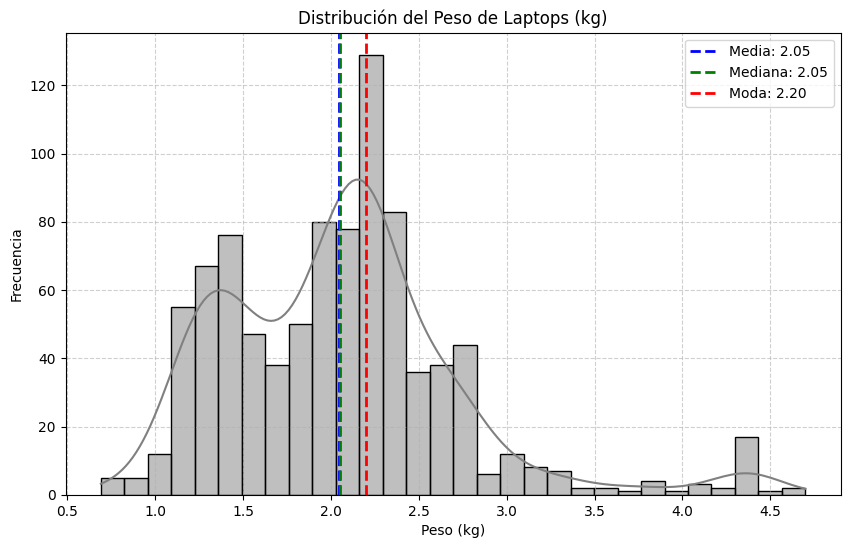

In [43]:
# Calcular media, mediana y moda
mean_weight = df['Weight (kg)'].mean()
median_weight = df['Weight (kg)'].median()
mode_weight = df['Weight (kg)'].mode()[0]  # La moda puede ser múltiple, tomamos la primera

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight (kg)'], bins=30, kde=True, color='grey')

# Agregar líneas de media, mediana y moda
plt.axvline(mean_weight, color='blue', linestyle='dashed', linewidth=2, label=f'Media: {mean_weight:.2f}')
plt.axvline(median_weight, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_weight:.2f}')
plt.axvline(mode_weight, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {mode_weight:.2f}')

# Personalizar gráfico
plt.title('Distribución del Peso de Laptops (kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()


Distribución bimodal, con pesos ligeros, ultrabook, y portatil convencional, más potente y pesado

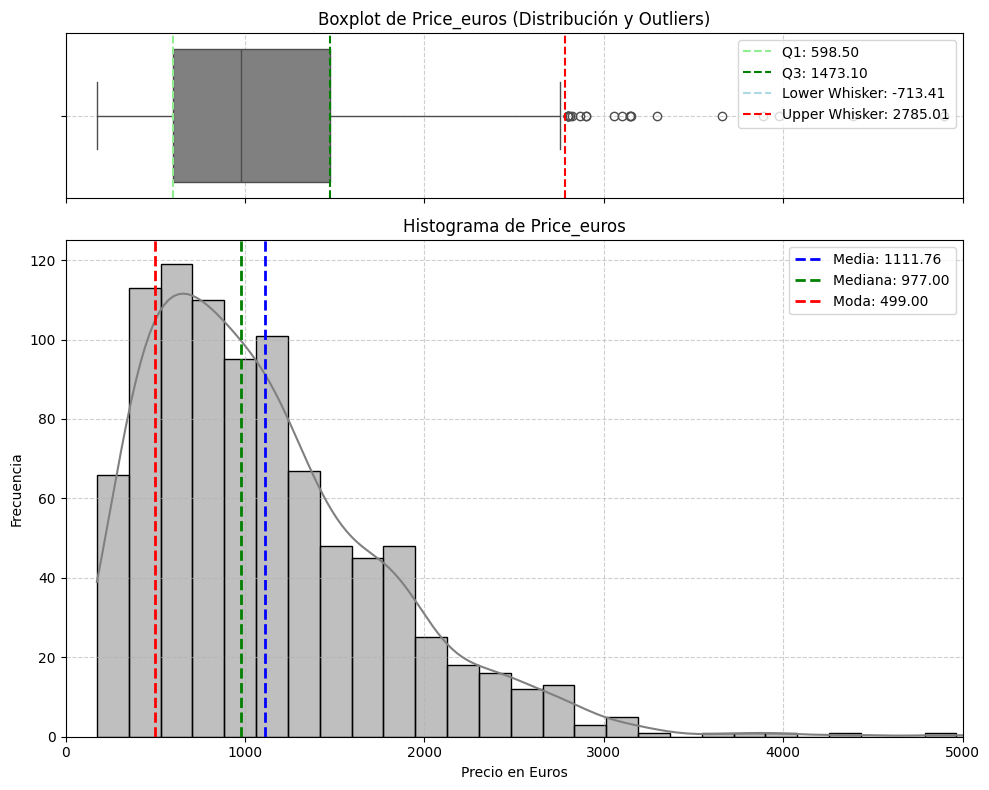

In [44]:
# Crear la figura y los subgráficos
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex= True, gridspec_kw={'height_ratios': [1, 3]})

# Gráfico de Boxplot (arriba)
sns.boxplot(x=df['Price_euros'], ax=ax[0], color='grey')
ax[0].set_title('Boxplot de Price_euros (Distribución y Outliers)')
ax[0].set_xlabel('')
ax[0].grid(True, linestyle='--', alpha=0.6)

# Obtener los valores de los cuartiles y bigotes
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Añadir líneas con los cuartiles y bigotes
ax[0].axvline(Q1, linestyle='--', color='lightgreen', label=f'Q1: {Q1:.2f}')
ax[0].axvline(Q3, linestyle='--', color='green', label=f'Q3: {Q3:.2f}')
ax[0].axvline(lower_whisker, linestyle='--', color='lightblue', label=f'Lower Whisker: {lower_whisker:.2f}')
ax[0].axvline(upper_whisker, linestyle='--', color='red', label=f'Upper Whisker: {upper_whisker:.2f}')

# Añadir una leyenda en la esquina–
ax[0].legend(loc='upper right')

# Calcular media, mediana y moda
mean_price = df['Price_euros'].mean()
median_price = df['Price_euros'].median()
mode_price = df['Price_euros'].mode()[0]  # La moda puede ser múltiple, tomamos la primera

# Histograma (abajo)
sns.histplot(df['Price_euros'], bins=30, kde=True, color='grey', ax=ax[1])
ax[1].set_title('Histograma de Price_euros')
ax[1].set_xlabel('Precio en Euros')
ax[1].set_ylabel('Frecuencia')
ax[1].grid(True, linestyle='--', alpha=0.6)

# Agregar líneas de media, mediana y moda
plt.axvline(mean_price, color='blue', linestyle='dashed', linewidth=2, label=f'Media: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_price:.2f}')
plt.axvline(mode_price, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {mode_price:.2f}')
plt.legend()

# Establecer el límite del eje X para ambos gráficos
ax[0].set_xlim(0, 5000)
ax[1].set_xlim(0, 5000)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [45]:
ordenadores_caros = df[df['Price_euros'] > 3500]

ordenadores_caros

,Company,Product,TypeName,"Inches("")",ScreenResolution,ScreenType,Resolution,Pixels,Cpu,CPU Maker,...,Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,OS Maker,OS Version,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
617,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,IPS Panel 4K Ultra HD,3840x2160,8294400,Intel Xeon E3-1535M v6 3.1GHz,Intel,...,0,0,Nvidia Quadro M2200M,Nvidia,Quadro M2200M,Windows 10,Windows,10,2.50,4899.0
758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,IPS Panel Full HD,1920x1080,2073600,Intel Xeon E3-1535M v5 2.9GHz,Intel,...,0,0,Nvidia Quadro M2000M,Nvidia,Quadro M2000M,Windows 7,Windows,7,3.00,4389.0
731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,4K Ultra HD,3840x2160,8294400,Intel Core i7 7700HQ 2.8GHz,Intel,...,1024,0,Nvidia GeForce GTX 1070,Nvidia,GeForce GTX 1070,Windows 10,Windows,10,4.36,3659.4
1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,IPS Panel Full HD,1920x1080,2073600,Intel Core i7 6820HK 2.7GHz,Intel,...,0,0,Nvidia GeForce GTX 980,Nvidia,GeForce GTX 980,Windows 10,Windows,10,3.58,3975.0
243,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Full HD,1920x1080,2073600,Intel Core i7 7820HK 2.9GHz,Intel,...,1024,0,Nvidia GeForce GTX 1080,Nvidia,GeForce GTX 1080,Windows 10,Windows,10,4.70,3890.0
839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,4K Ultra HD / Touchscreen,3840x2160,8294400,Intel Core i7 7820HK 2.9GHz,Intel,...,0,0,Nvidia GeForce GTX 1080,Nvidia,GeForce GTX 1080,Windows 10,Windows,10,3.49,5499.0


Decido eliminar aquellos ordenadores cuyo precio esté un 30% del bigote superior, es decir, outliers a partir de un 30% superior

In [46]:
def eliminar_caros(df, columna_precio='Price_euros'):
    # Calcular los cuartiles y bigotes
    Q1 = df[columna_precio].quantile(0.25)
    Q3 = df[columna_precio].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    
    # Calcular el límite superior
    limite_superior = upper_whisker * 1.3   #elimino aquellos que valgan un 30% más.
    
    # Filtrar el DataFrame
    df_filtrado = df[df[columna_precio] < limite_superior]
    
    return df_filtrado

df = eliminar_caros(df)

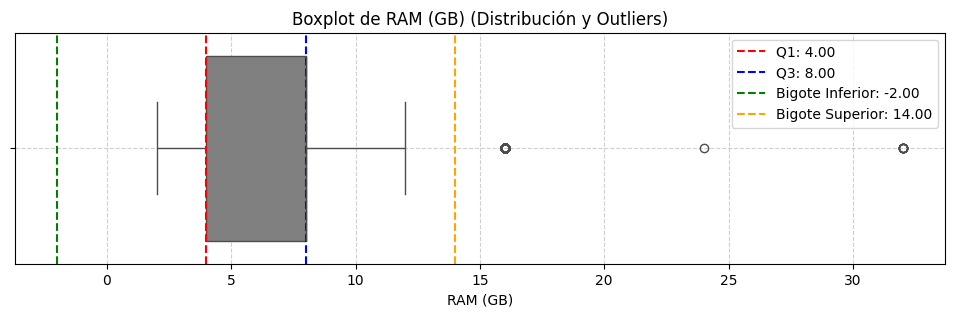

In [47]:
# Crear el gráfico de Boxplot
fig, ax = plt.subplots(figsize=(12, 3))

# Boxplot de la columna 'RAM (GB)'
sns.boxplot(x=df['RAM (GB)'], ax=ax, color='grey')
ax.set_title('Boxplot de RAM (GB) (Distribución y Outliers)')
ax.set_xlabel('RAM (GB)')
ax.grid(True, linestyle='--', alpha=0.6)

# Obtener los valores de los cuartiles y bigotes
Q1 = df['RAM (GB)'].quantile(0.25)
Q3 = df['RAM (GB)'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Añadir líneas con los cuartiles y bigotes
ax.axvline(Q1, linestyle='--', color='red', label=f'Q1: {Q1:.2f}')
ax.axvline(Q3, linestyle='--', color='blue', label=f'Q3: {Q3:.2f}')
ax.axvline(lower_whisker, linestyle='--', color='green', label=f'Bigote Inferior: {lower_whisker:.2f}')
ax.axvline(upper_whisker, linestyle='--', color='orange', label=f'Bigote Superior: {upper_whisker:.2f}')

# Añadir una leyenda en la esquina
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

In [48]:
def eliminar_RAMalta(df, columna_RAM='RAM (GB)'):
    # Calcular los cuartiles y bigotes
    Q1 = df[columna_RAM].quantile(0.25)
    Q3 = df[columna_RAM].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    
    # Calcular el límite superior
    limite_superior = upper_whisker * 1.3
    
    # Filtrar el DataFrame
    df_filtrado = df[df[columna_RAM] < limite_superior]
    
    return df_filtrado

df = eliminar_RAMalta(df)

Este grafico simplemente para ver si Apple versus otras marcas se situan en una parte determinada

/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_35415/41649749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Company'].apply(lambda x: 'Apple' if x == 'Apple' else 'otras'), y='Price_euros', width= .2, data=df, palette=['red', 'blue'])
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_35415/41649749.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Company Category', loc='upper left', bbox_to_anchor=(1, 1))


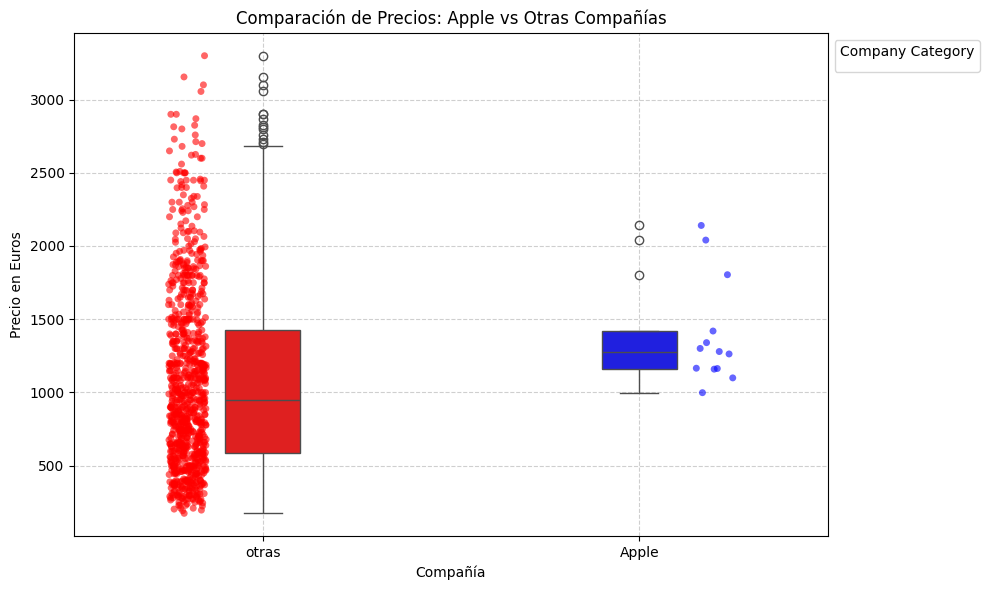

In [49]:

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Crear el boxplot directamente usando una clasificación temporal
sns.boxplot(x=df['Company'].apply(lambda x: 'Apple' if x == 'Apple' else 'otras'), y='Price_euros', width= .2, data=df, palette=['red', 'blue'])

# Superponer el scatterplot usando una clasificación temporal
sns.stripplot(x=df['Company'].apply(lambda x: 'Apple' if x == 'Apple' else 'otras'), y='Price_euros', data=df, jitter=True, hue=df['Company'].apply(lambda x: 'Apple' if x == 'Apple' else 'otras'), dodge=True, palette=['red', 'blue'], alpha=0.6)

# Ajustar la leyenda y otras configuraciones
plt.title('Comparación de Precios: Apple vs Otras Compañías')
plt.xlabel('Compañía')
plt.ylabel('Precio en Euros')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Company Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [50]:
df.to_parquet('data/processed/com_proceso_0.parquet') 
"""hasta este momento guardo el procesado sin eliminar columnas, 
solo convirtiendo a numéricas las que obviamente lo eran, elimando unidades, etc"""

print("El archivo com_proceso_0.parquet se ha guardado en la carpeta 'data/processed'.")

El archivo com_proceso_0.parquet se ha guardado en la carpeta 'data/processed'.


In [51]:
df.head(2)

,Company,Product,TypeName,"Inches("")",ScreenResolution,ScreenType,Resolution,Pixels,Cpu,CPU Maker,...,Memory HDD (GB),Memory SSHD (GB),Gpu,GPU Maker,GPU Model,OpSys,OS Maker,OS Version,Weight (kg),Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Touchscreen,1366x768,1049088,Intel Core M 7Y30 1.0GHz,Intel,...,0,0,Intel HD Graphics 615,Intel,HD Graphics 615,Windows 10,Windows,10,1.39,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,Full HD,1920x1080,2073600,AMD FX 9830P 3GHz,AMD,...,1024,0,AMD Radeon RX 560,AMD,Radeon RX 560,Windows 10,Windows,10,2.45,699.0


Voy a realizar una primera limpieza de columnas categóricas que no considero afecten al modelo de predicción de precio que estamos planteando. Aquí obviamente aplico criterios razonados, pero discutibles, para decidir con cuales me quedo. De esta manera tendré menos trabajo que realizar en las columnas categóricas.

- Producto no me dice nada aprovechable para entrenar un modelo de predicción de precios
- ScreenResolution ya esta empleada y separada, es redundante
- Resolution contiene información pasada a Pixeles, es superflua
- Cpu ya está procesada y separada, es redundante
- Memory, que indica el almacenamiento en disco, ya se procesó en tres columnas, es redundante
- Gpu, idem que Cpu
- GPU Model, auqneo podría investigarse, me parece sería dificil segmentar cada modelo y asignarles un valor en función de la información que disponemos
- OpSys ya está procesada y separada, es redundante
- Os Maker, pienso que carece de incidencia alguna en el precio
- Os Version, lo mismo

In [52]:
df = df.drop(columns=['Product', 'ScreenResolution', 'Resolution', 'Cpu', 'Memory', 'Gpu', 'GPU Model', 'OpSys', 'OS Maker','OS Version'])

In [53]:
df.columns.tolist()

['Company',
 'TypeName',
 'Inches(")',
 'ScreenType',
 'Pixels',
 'CPU Maker',
 'CPU Model',
 'RAM (GB)',
 'Memory SSD (GB)',
 'Memory HDD (GB)',
 'Memory SSHD (GB)',
 'GPU Maker',
 'Weight (kg)',
 'Price_euros']

In [54]:
df.shape

(896, 14)

In [ ]:
df.to_parquet('data/processed/com_proceso_1.parquet') 
"""hasta este momento guardo el procesado despues de eliminar columnas, 
que no voy a considerar y entrenar"""

print("El archivo com_proceso_1.parquet se ha guardado en la carpeta 'data/processed'.")

____________
Voy a realizar a partir de aquí las imputaciones, para convertir categóricas a numéricas. 

In [144]:
df = pd.read_parquet ('data/processed/com_proceso_1.parquet')

In [ ]:
df.select_dtypes (include=('object', 'string')).head()

In [ ]:
# Crear un diccionario con valores únicos de 'Company' asignando un número
company_mapping = {str(company): idx for idx, company in enumerate(df["Company"].unique(), start=1)}
df["Company"] = df["Company"].map(company_mapping)

company_mapping


In [ ]:
# Prosigo por la CPU
print(df['CPU Maker'].unique())

In [233]:
# Configuración para permitir el downcasting sin advertencias
pd.set_option('future.no_silent_downcasting', True)

df['CPU Maker'] = df['CPU Maker'].replace (({'Intel':0, 'AMD':1, 'Samsung':2})).astype('int32')


In [ ]:
# Prosigo por la GPU
print(df['GPU Maker'].unique())

In [235]:
df['GPU Maker'] = df['GPU Maker'].replace (({'Intel':0, 'AMD':1, 'Nvidia':2, 'ARM':3})).astype('int32')

Voy a separar en tantas columnas como tipo de ordenadores aparecen, seis tipos, con 0s y 1s

In [ ]:
print(df['TypeName'].unique())

In [237]:
# Usar pd.get_dummies para columnas categóricas
type_dummies = pd.get_dummies(df['TypeName'], dtype= 'int32')

# Insertar las columnas dummy inmediatamente después de la columna 'Company' (o cualquier otra columna específica)
df = pd.concat([df.iloc[:, :df.columns.get_loc('TypeName')+1], type_dummies, df.iloc[:, df.columns.get_loc('TypeName')+1:]], axis=1)

# Reemplazar la columna 'TypeName' original con las columnas dummy
df = df.drop('TypeName', axis=1)  # Eliminar la columna original

In [ ]:
df.head(1)

In [ ]:
df.select_dtypes (include=('object', 'string')).head()

Ahora con CPU Model, a ver qué información quiero extraer.  Veo que es complejo sacar modelo comparables, generación del procesador, etc, y quizá tampoco tenga deamsiado efecto en el precio, así que me quedo solo con la velocidad, que en el fondo da una clasificación simple de los ultimos/ mejores y más caros procesadores, y que intuyo tendrá una alta corresondencia con el precio. 

In [ ]:

print(df['CPU Model'].unique())

In [ ]:
# Función para extraer la frecuencia en GHz
def extract_cpu_ghz(cpu_model):
    match = re.search(r'(\d+(\.\d+)?)GHz', cpu_model)  # Busca el número seguido de GHz
    if match:
        return float(match.group(1))  # Si encuentra el valor, lo devuelve como float
    return None  # Si no encuentra el valor, devuelve None

# Aplicar la función para crear la nueva columna
df['CPU(Ghz)'] = df['CPU Model'].apply(extract_cpu_ghz)

# Reordenar las columnas para que 'CPU(Ghz)' quede justo después de 'CPU Model'
columnas = df.columns.tolist()
indice_cpu_model = columnas.index('CPU Model')
columnas.insert(indice_cpu_model + 1, columnas.pop(columnas.index('CPU(Ghz)')))  # Mover 'CPU(Ghz)' justo después de 'CPU Model'
df = df[columnas]  # Reorganizar las columnas

df = df.drop('CPU Model', axis=1) 

df.head()

Finalmente, voy a tratar el tipo de pantalla, y solo me voy a quedar con si es o no 'Tocuchscreen' y si es o no de tecnología 'IPS' el panel, dado que es más caro. 

In [ ]:
print(df['ScreenType'].unique())

In [ ]:
# Crear columna 'Touchscreen' que es 1 si contiene 'Touchscreen', 0 si no
df['Touchscreen'] = df['ScreenType'].str.contains('Touchscreen', case=False, na=False).astype('int32')

# Crear columna 'IPS' que es 1 si contiene 'IPS', 0 si no
df['IPS'] = df['ScreenType'].str.contains('IPS', case=False, na=False).astype('int32')

# Reordenar columnas: insertar después de 'ScreenType'
columnas = df.columns.tolist()  # Obtener todas las columnas como lista
indice_scr = columnas.index('ScreenType')  # Obtener la posición de 'ScreenType'

# Reorganizar la lista de columnas
new_cols_order = columnas[:indice_scr+1] + ['Touchscreen', 'IPS'] + columnas[indice_scr+1:-2]  # Mover columnas
df = df[new_cols_order]  # Reasignar dataframe con el nuevo orden

# Eliminar la columna original 'ScreenType' si ya no es necesaria
df.drop(columns=['ScreenType'], inplace=True)

# Ver los primeros registros para confirmar
df.head()

In [ ]:
df.info()

In [ ]:
df.to_parquet('data/processed/com_proceso_2.parquet') 
"""hasta este momento guardo el procesado despues de eliminar columnas, 
que no voy a considerar y entrenar"""

print("El archivo com_proceso_2.parquet se ha guardado en la carpeta 'data/processed'.")

______________________________________
A partir de aquí, puedo cargar el archivo siguiente y seguir trabajando

In [246]:
df = pd.read_parquet ('data/processed/com_proceso_2.parquet')

## Comprobaciones necesarias para Machine Learning

Para un modelo de regresión lineal, que vamos a aplicar, vamos a comprobar que se cumplen las condiciones mínimas exigibles

#### No linealidad o multicolinealidad

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=["float64", "int64", "int32"])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el heatmap simétrico con la diagonal de unos
plt.figure(figsize=(12, 9))  # Ajusta el tamaño de la figura

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, cbar=True, vmin=-1, vmax=1, square=True)

# Título y ajustes en el gráfico
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=["float64", "int64", "int32"])

# Añadir una columna constante para que el cálculo del VIF tenga en cuenta el término independiente
df_with_const = add_constant(df_numeric)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Mostrar el VIF para cada variable
print(vif_data)

Observo que Inches tiene una valor elevado, y en el precio, apenas tiene correlación con él, así que decido prescindir de esa columna

In [249]:
df = df.drop(columns=['Inches(")'])

Tengo mis dudas con RAM (GB) y Memory SSD (GB), que también tienen alta correlación. Me cabe la duda de si borrar SSD.

Segun esta prueba, de Varianza, ningunas de las variables tienen alga correlación o multicolinealidad. Pero si moderada, en el caso de 

#### Distribución normal de la variable respuesta

Comprobamos como está distribuida la target 'Price_euros'

In [ ]:
# 1Histograma de Price_euros
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], bins=30, kde=True, color='blue')
plt.title('Distribución de Price_euros')
plt.xlabel('Price_euros')
plt.ylabel('Frecuencia')
plt.show()

# 2Q-Q Plot con stats.probplot
plt.figure(figsize=(6,6))
stats.probplot(df['Price_euros'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Price_euros")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de la muestra")
plt.grid()
plt.show()

# Test de Normalidad
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df['Price_euros'])
print(f"Shapiro-Wilk Test: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}")

# D’Agostino-Pearson Test
dagostino_test = stats.normaltest(df['Price_euros'])
print(f"D'Agostino-Pearson Test: Estadístico={dagostino_test.statistic:.4f}, p-valor={dagostino_test.pvalue}")

# Anderson-Darling Test
anderson_test = stats.anderson(df['Price_euros'])
print(f"Anderson-Darling Test: Estadístico={anderson_test.statistic}")
print(f"Valores Críticos: {anderson_test.critical_values}")
print(f"Niveles de Significancia: {anderson_test.significance_level}")


Los datos de precio NO siguen una distribución normal. Voya a intentar normalizarlos, probando diferentes métodos. 

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Aplicar transformaciones
df['Price_log'] = np.log(df['Price_euros'])
df['Price_sqrt'] = np.sqrt(df['Price_euros'])

# Box-Cox (requiere valores positivos)
df['Price_boxcox'], _ = stats.boxcox(df['Price_euros'])

# Yeo-Johnson (sirve para negativos y ceros)
pt = PowerTransformer(method='yeo-johnson')
df['Price_yeojohnson'] = pt.fit_transform(df[['Price_euros']])

# Crear gráficos para comparar
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Histograma original
sns.histplot(df['Price_euros'], bins=30, kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title('Distribución Original')

# Log
sns.histplot(df['Price_log'], bins=30, kde=True, ax=axes[1,0], color='red')
axes[1,0].set_title('Transformación Logarítmica')

# Raíz cuadrada
sns.histplot(df['Price_sqrt'], bins=30, kde=True, ax=axes[1,1], color='green')
axes[1,1].set_title('Transformación Raíz Cuadrada')

# Box-Cox
sns.histplot(df['Price_boxcox'], bins=30, kde=True, ax=axes[2,0], color='purple')
axes[2,0].set_title('Transformación Box-Cox')

# Yeo-Johnson
sns.histplot(df['Price_yeojohnson'], bins=30, kde=True, ax=axes[2, 1], color='orange')
axes[2,1].set_title('Transformación Yeo-Johnson')

# Eliminar gráfico vacío si no hay un sexto subplot
fig.delaxes(axes[0, 1])  


plt.tight_layout()
plt.show()


In [ ]:
# Graficar Q-Q plots para cada transformación
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Q-Q Plot original
stats.probplot(df['Price_euros'], dist="norm", plot=axes[0,0])
axes[0,0].set_title("Q-Q Plot: Original")

# Log
stats.probplot(df['Price_log'], dist="norm", plot=axes[0,1])
axes[0,1].set_title("Q-Q Plot: Logarítmica")

# Raíz cuadrada
stats.probplot(df['Price_sqrt'], dist="norm", plot=axes[1,0])
axes[1,0].set_title("Q-Q Plot: Raíz Cuadrada")

# Box-Cox
stats.probplot(df['Price_boxcox'], dist="norm", plot=axes[1,1])
axes[1,1].set_title("Q-Q Plot: Box-Cox")

plt.tight_layout()
plt.show()


In [ ]:
# Shapiro-Wilk Test para cada transformación
for col in ['Price_euros', 'Price_log', 'Price_sqrt', 'Price_boxcox']:
    stat, p = stats.shapiro(df[col])
    print(f"Shapiro-Wilk Test ({col}): Estadístico={stat}, p-valor={p}")


De todos ellos, la que mejor funciona es Box-Cox, pero me voy a quedar con Logarítmica, pues puedo explicarla mejor. 